In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
movie = pd.read_csv('data/movie.csv')

In [3]:
movie.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [4]:
#### get the budget of moview in Millions

In [5]:
med_budget = movie.groupby('title_year')['budget'].median() / 1e6

In [6]:
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()

In [7]:
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [8]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [9]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

### for line plot, use the plot method.

Text(0, 0.5, 'Millions of Dollars')

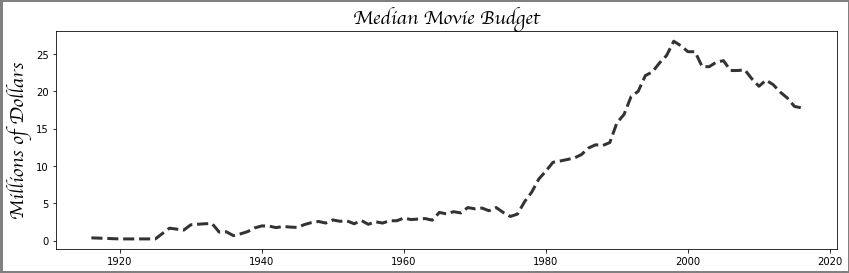

In [10]:
fig, ax = plt.subplots(figsize=(14, 4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs = dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

#### Budget increased a lot around 2000, is this real or number of movies are more in 2000's

In [11]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

### plotting the number of movies against the budget

In [12]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

In [13]:
fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
years_5

array([1970., 1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010.,
       2015.])

In [14]:
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]
ct_norm_5[2:]
years_5[5:]

array([1995., 2000., 2005., 2010., 2015.])

### bar method of the Axes object 

In [15]:
ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')

<BarContainer object of 10 artists>

In [16]:
ax.set_xlim(1968, 2017)

(1968.0, 2017.0)

#### adding the text to each bar in the histogram

In [17]:
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')

In [18]:
ax.legend()

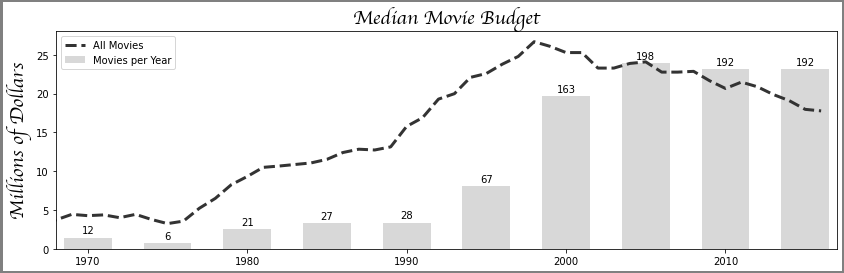

In [19]:
fig  #note, we modified the existing axes object which already has plot

#### the plot suggest that moview increased, but still the budget decreased

In [20]:
movie_sorted = movie.sort_values('budget', ascending=False)

#### picking top10 budget movies from each year, using groupby

In [21]:
top10 = movie_sorted.groupby('title_year')['budget']\
                     .apply(lambda x: x.iloc[:10].median() / 1e6)

In [22]:
top10.tail()

title_year
2012.0    214.5
2013.0    200.0
2014.0    179.0
2015.0    175.5
2016.0    176.5
Name: budget, dtype: float64

In [23]:
top10_roll = top10.rolling(5, min_periods=1).mean()

In [24]:
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

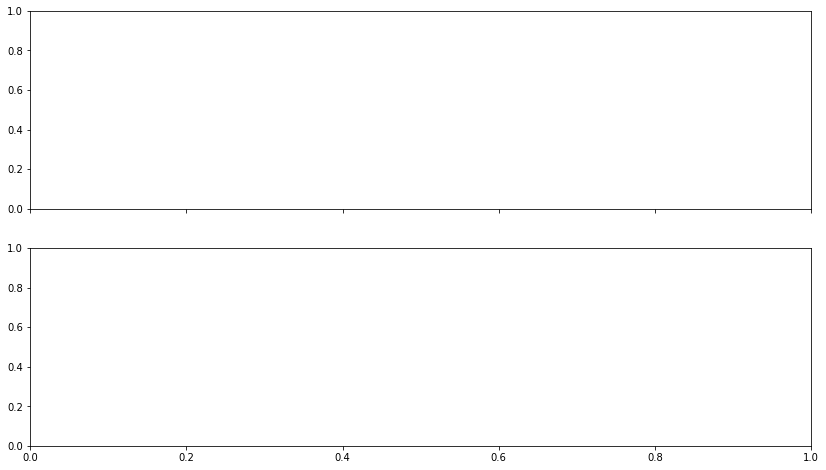

In [25]:
fig2 , axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
ax1 = axes[0]
ax2 = axes[1]

In [26]:
ax1.plot(years, budget, 
         linestyle='--', linewidth=3, color='.2',
         label='All Movies')

In [27]:
ax1.bar(years_5, ct_norm_5, 3,
        facecolor='.5', alpha=.3,
        label='Movies per Year')

<BarContainer object of 10 artists>

In [28]:
ax1.legend(loc='upper left')

In [29]:
ax1.set_xlim(1968, 2017)

(1968.0, 2017.0)

In [30]:
plt = plt.setp(ax1.get_xticklines(), visible=False)

In [31]:
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')

In [32]:
ax2.plot(years, top10_roll.values, 
         color='.2',
         label='Top 10 Movies')

In [33]:
ax2.legend(loc='upper left')

In [34]:
fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y=1.02, **text_kwargs)
fig2.text(0, .6, 
          'Millions of Dollars', 
          rotation='vertical', ha='center',
          **text_kwargs)

Text(0, 0.6, 'Millions of Dollars')

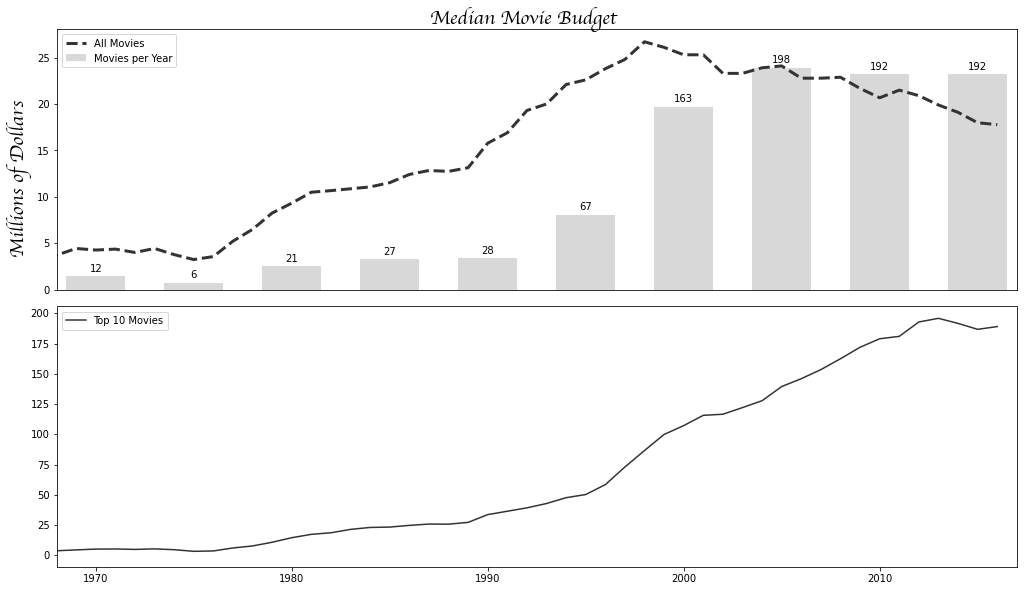

In [35]:
fig2

In [36]:
path = os.path.expanduser('movie_budget.png')
fig2.savefig(path, bbox_inches='tight')